# Unidad 4:
## 4.1 Velas Japonesas


In [10]:
import ipywidgets as widgets
from ipywidgets import interact, IntSlider, Dropdown, DatePicker
from IPython.display import display, clear_output
from datetime import date

In [11]:
import yfinance as yf
import pandas as pd

In [12]:
#ticker menu
dropdown = widgets.Dropdown(
    options=["KOF", "AAPL", "MSFT", "MA","NVDA", "GOOGL", "AMZN", "META", "TSM","BRK-B", "V", "JPM", "XOM", "LLY", "MRK", "UNH", "PG", "MA","CVX", "KO", "PEP", "COST", "TMO", "ORCL", "CSCO", "NKE", "VZ", "ASML", "TXN", "ABT", "TM", "SAP", "AMD", "NFLX", "NOW", "ADBE", "LVMUY", "BABA", "SHEL", "TMUS", "QCOM", "PFE", "SNY", "AZN", "TOT", "GSK", "RIO", "BHP", "MCD​"],
    #options=["BTC-USD", "ETH-USD", "USDT-USD", "XRP-USD", "LTC-USD", "ADA-USD", "DOT-USD", "BCH-USD", "XLM-USD", "LINK-USD"]
    value="KOF",
    description='Ticker:',
    disabled = False,
    rows=5
)

# start_date
date_picker = widgets.DatePicker(
    description = 'start_date',
    disabled = False,
    value = date(2020, 1, 1)
)

# end_date
date_picker2 = widgets.DatePicker(
    description = 'end_date',
    disabled = False,
    value=date.today()
)

In [13]:
# Esto funciona en colabs pero no en VSCode
""" #@title Seleccione Stock y Fecha {run:'auto'}
ticker = "JPM" #@param ["KOF", "AAPL", "MSFT", "MA","NVDA", "GOOGL", "AMZN", "META", "TSM","BRK-B", "V", "JPM", "XOM", "LLY", "MRK", "UNH", "PG", "MA","CVX", "KO", "PEP", "COST", "TMO", "ORCL", "CSCO", "NKE", "VZ", "ASML", "TXN", "ABT", "TM", "SAP", "AMD", "NFLX", "NOW", "ADBE", "LVMUY", "BABA", "SHEL", "TMUS", "QCOM", "PFE", "SNY", "AZN", "TOT", "GSK", "RIO", "BHP", "MCD​"]
#ticker = "BTC-USD" #@param ["BTC-USD", "ETH-USD", "USDT-USD", "XRP-USD", "LTC-USD", "ADA-USD", "DOT-USD", "BCH-USD", "XLM-USD", "LINK-USD"]

start_date = '2023-01-01' #@param {type:'date'}
end_date = '2025-08-28' #@param {type:'date'}
# cripto=False #@param {type:'boolean'}
"""

' #@title Seleccione Stock y Fecha {run:\'auto\'}\nticker = "JPM" #@param ["KOF", "AAPL", "MSFT", "MA","NVDA", "GOOGL", "AMZN", "META", "TSM","BRK-B", "V", "JPM", "XOM", "LLY", "MRK", "UNH", "PG", "MA","CVX", "KO", "PEP", "COST", "TMO", "ORCL", "CSCO", "NKE", "VZ", "ASML", "TXN", "ABT", "TM", "SAP", "AMD", "NFLX", "NOW", "ADBE", "LVMUY", "BABA", "SHEL", "TMUS", "QCOM", "PFE", "SNY", "AZN", "TOT", "GSK", "RIO", "BHP", "MCD\u200b"]\n#ticker = "BTC-USD" #@param ["BTC-USD", "ETH-USD", "USDT-USD", "XRP-USD", "LTC-USD", "ADA-USD", "DOT-USD", "BCH-USD", "XLM-USD", "LINK-USD"]\n\nstart_date = \'2023-01-01\' #@param {type:\'date\'}\nend_date = \'2025-08-28\' #@param {type:\'date\'}\n# cripto=False #@param {type:\'boolean\'}\n'

In [27]:
btn   = widgets.Button(description="Cargar DataFrame", button_style="primary", icon="bar-chart")
out   = widgets.Output()

df = None # global valiable

def run(_):
    with out:
        clear_output()
        # Construir lista de tickers y fechas
        global ticker
        ticker = dropdown.value
        print("ticker:", ticker)
        start_date = date_picker.value
        print("start_date:",start_date)
        end_date = date_picker2.value
        print("end_date:",end_date)

        global df
        df = yf.download(ticker, start_date, end_date, auto_adjust=True) #nota estan Adjusted (dividendos) por default
        df.tail()

        # quitar el subnivel 1
        df.columns = df.columns.droplevel(1)
        print(df)

        return df

In [28]:
# Mostrar UI
box_top = widgets.HBox([dropdown, widgets.VBox([date_picker, date_picker2, btn])])
display(box_top, out)

btn.on_click(run)


Output()

### Gráfico de Velas Japonesas

In [34]:
try:
    import mplfinance as mpf
except ImportError:
    !pip install mplfinance
    import mplfinance as mpf

<Mpf_Figure size 42000x19200 with 0 Axes>

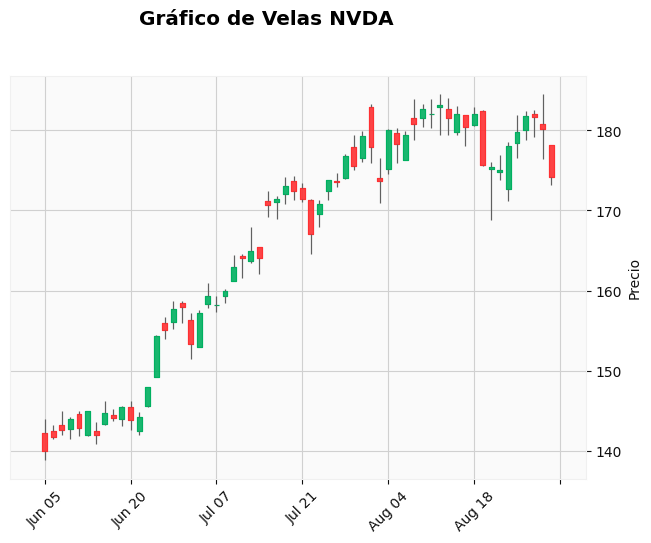

In [35]:
# Subconjunto para gráfico (últimos 60 días)
df_candle = df[['Open', 'High', 'Low', 'Close']].copy()
df_last60 = df_candle.tail(60)

# Gráfico de velas con SMA incorporadas
# dimensiones del gráfico mpf
mpf.figure(figsize=(35, 16), dpi=1200)
mpf.plot(df_last60, type='candle', style='yahoo', title=f"Gráfico de Velas {ticker}", ylabel='Precio', volume=False)


### Inversion vs Ganancia o Perdida

In [42]:
inversion = 1000
compra= 180 # 3 junio 2025
acciones = inversion / compra
print("acciones=",acciones)
venta = 200
ganancia = venta * acciones
print("ganancia=",ganancia)
rendimiento = (ganancia - inversion)  / inversion
print("rendimiento=",rendimiento*100,"%")


acciones= 5.555555555555555
ganancia= 1111.111111111111
rendimiento= 11.111111111111109 %


In [43]:
pesos = 15_000 / 18.65
usd = pesos #804.28
conversion = 241 * 18.65
print(conversion)

4494.65


### Interpretación de Velas

Documento de Apoyo
https://drive.google.com/file/d/1frlS4P-l8xt6AfDZzf5SVXxkZQZkCp1F/view?usp=sharing

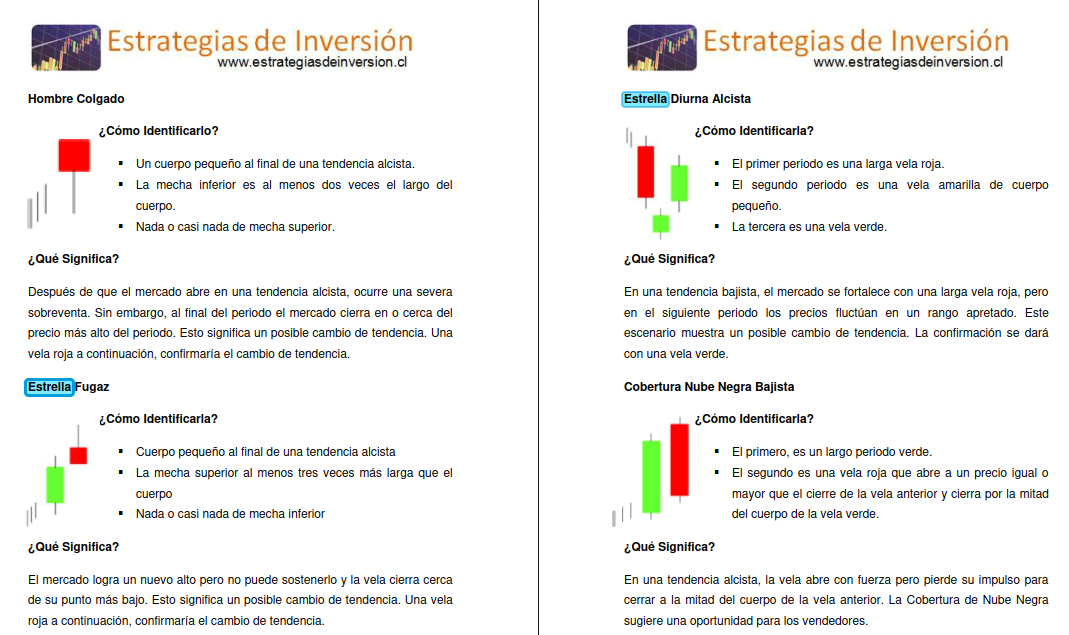


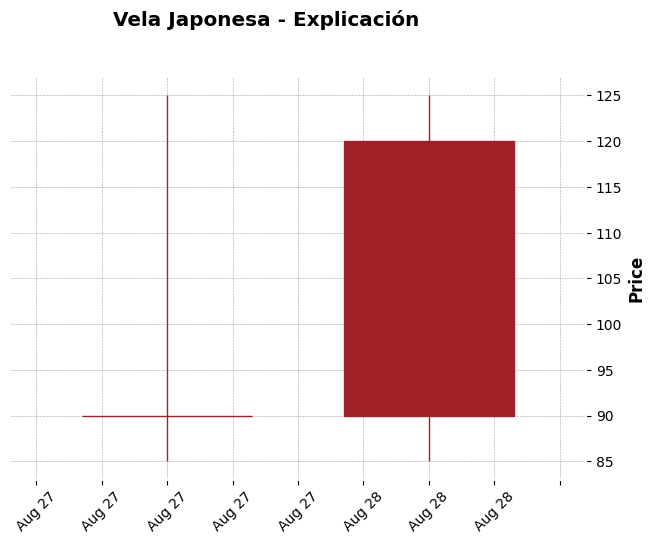

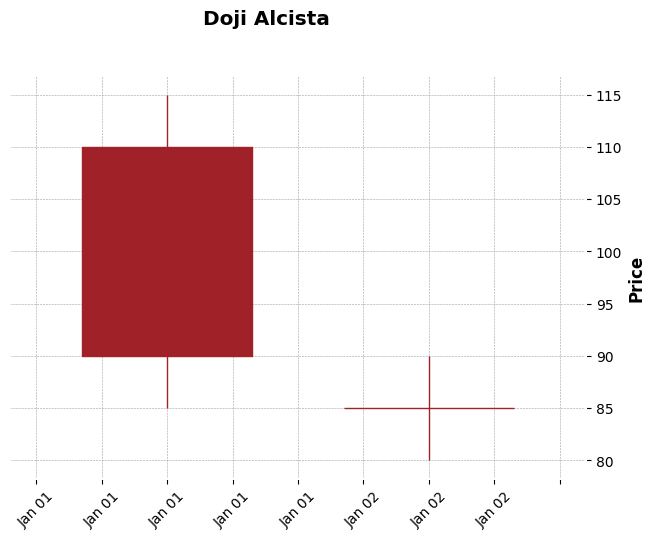

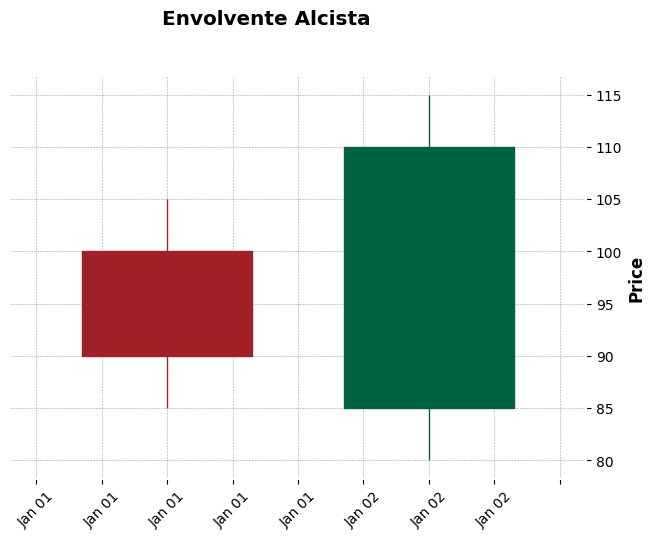

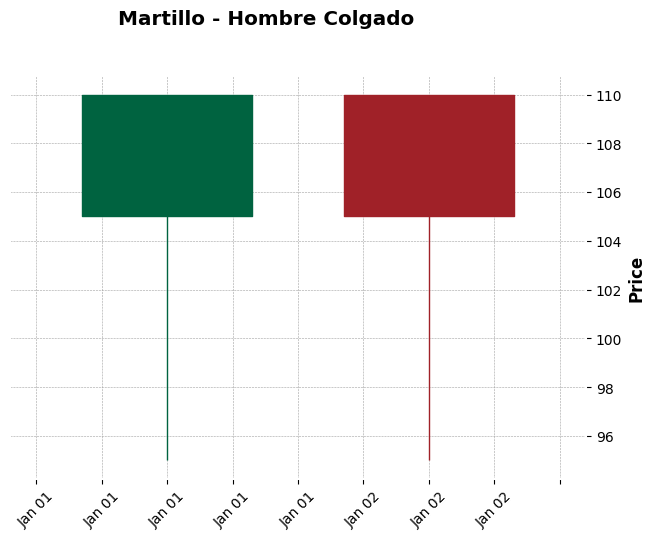

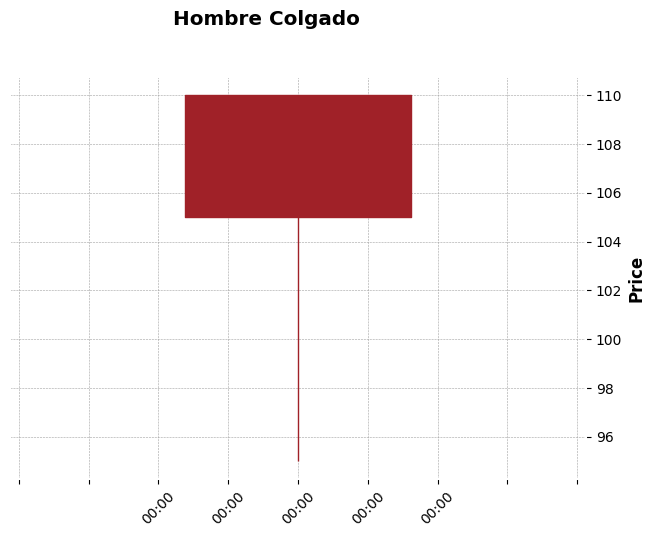

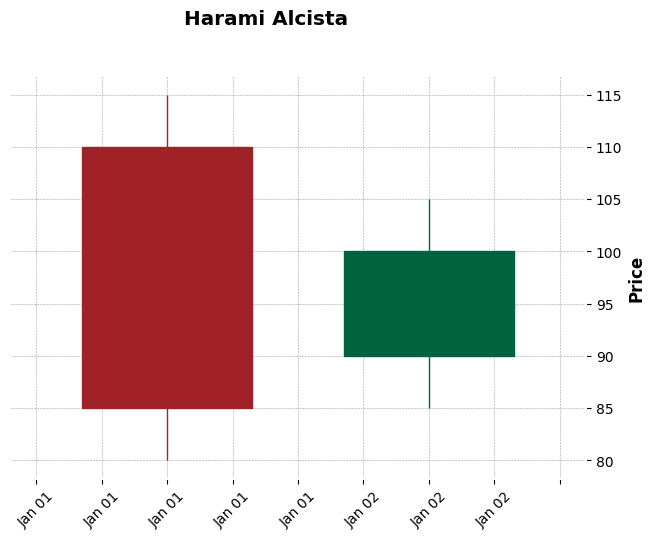

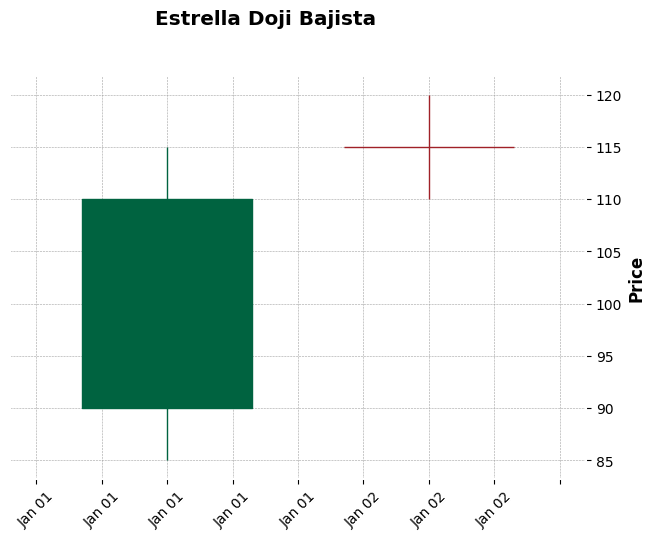

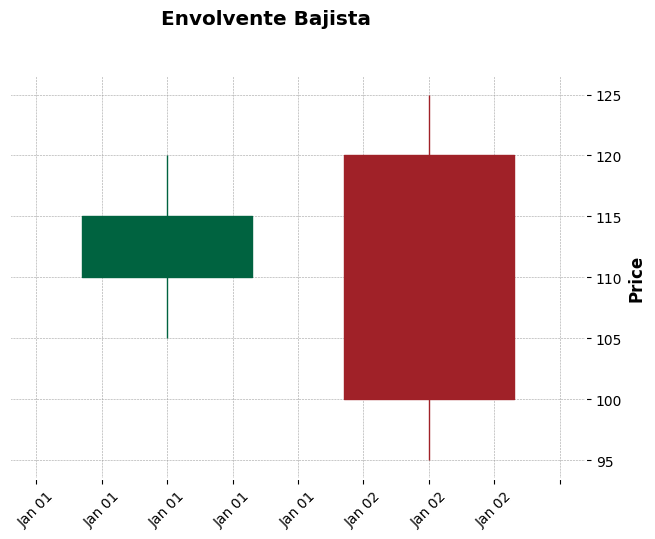

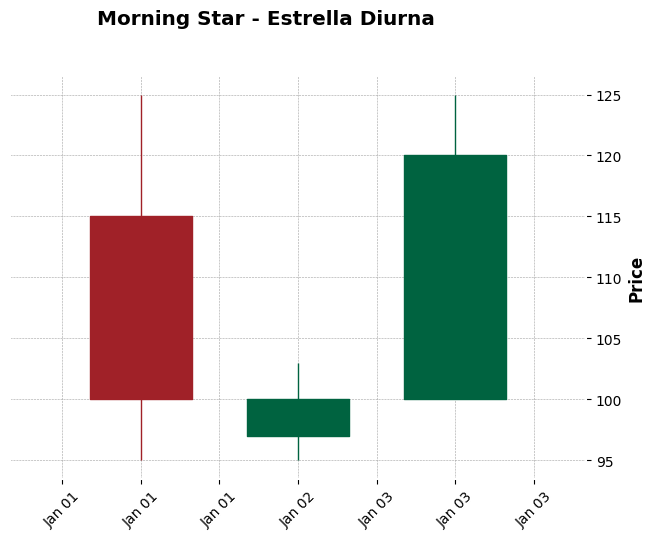

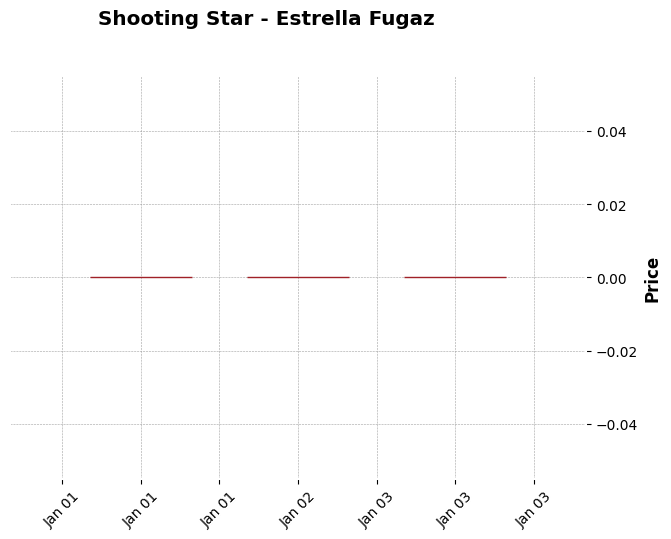

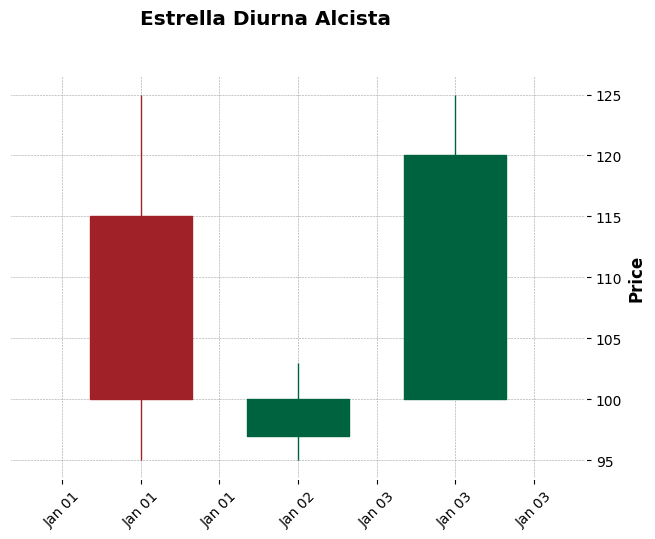

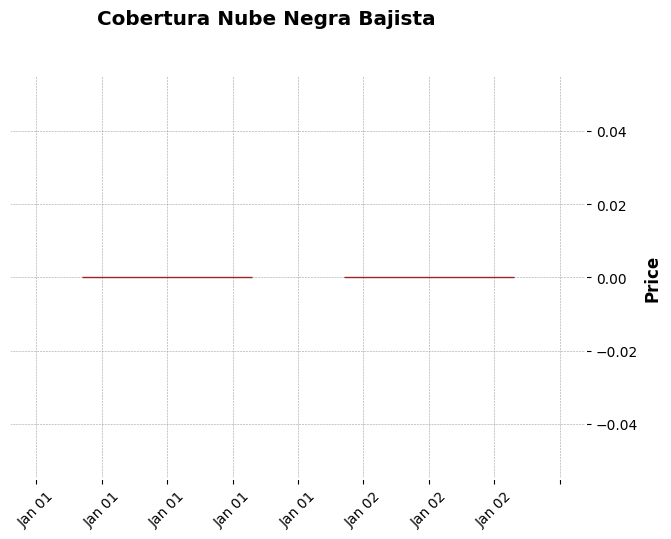

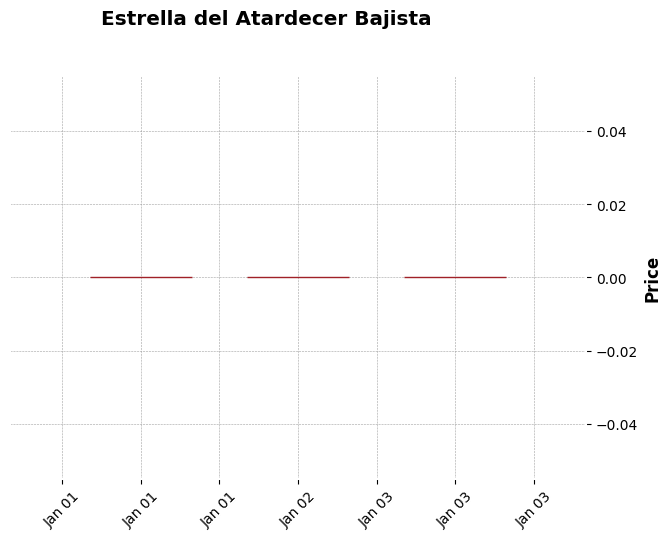

In [26]:
### Interpretación de Velas

import matplotlib.pyplot as plt
import pandas as pd
import mplfinance as mpf
from datetime import datetime

# Crear datos ficticios para cada patrón
patterns = {
"Vela Japonesa - Explicación": {
        "Date": ["2025-08-27", "2025-08-28"],
        "Open": [90, 120],
        "High": [125, 125],
        "Low": [85, 85],
        "Close": [90, 90]
    },
    ###
    "Doji Alcista": {
        "Date": ["2024-01-01", "2024-01-02"],
        "Open": [110, 85],
        "High": [115, 90],
        "Low": [85, 80],
        "Close": [90, 85]
    },
    "Envolvente Alcista": {
        "Date": ["2024-01-01", "2024-01-02"],
        "Open": [100, 85],
        "High": [105, 115],
        "Low": [85, 80],
        "Close": [90, 110]
    },

    "Martillo - Hombre Colgado": {
        "Date": ["2024-01-01", "2024-01-02"],
        "Open": [105,110],
        "High": [105,110],
        "Low": [95,95],
        "Close": [110,105]
    },

    "Hombre Colgado": {
        "Date": ["2024-01-01"],
        "Open": [110],
        "High": [110],
        "Low": [95],
        "Close": [105]
    },

    "Harami Alcista": {
        "Date": ["2024-01-01", "2024-01-02"],
        "Open": [110, 90],
        "High": [115, 105],
        "Low": [80, 85],
        "Close": [85, 100]
    },

    "Estrella Doji Bajista": {
        "Date": ["2024-01-01", "2024-01-02"],
        "Open": [90, 115],
        "High": [115, 120],
        "Low": [85, 110],
        "Close": [110, 115]
    },

    "Envolvente Bajista": {
        "Date": ["2024-01-01", "2024-01-02"],
        "Open": [110, 120],
        "High": [120, 125],
        "Low": [105, 95],
        "Close": [115, 100]
    },

    "Morning Star - Estrella Diurna": {
        "Date":  ["2024-01-01", "2024-01-02", "2024-01-03"],
        "Open":  [115,  97,     100],
        "High":  [125,  103,    125],
        "Low":   [95,   95,     100],
        "Close": [100,  100,    120]
    },

    ### Actividad
    ### Segmento para corregir

    "Shooting Star - Estrella Fugaz": {
        "Date": ["2024-01-01", "2024-01-02","2024-01-03"],
        "Open": [0, 0,0],
        "High": [0, 0,0],
        "Low": [0, 0,0],
        "Close": [0, 0,0]
    },

    "Estrella Diurna Alcista": {
        "Date": ["2024-01-01", "2024-01-02", "2024-01-03"],
        "Open": [115, 97, 100],
        "High": [125, 103, 125],
        "Low": [95, 95, 100],
        "Close": [100, 100, 120]
    },

"Cobertura Nube Negra Bajista": {
        "Date": ["2024-01-01", "2024-01-02"],
        "Open": [0, 0],
        "High": [0, 0],
        "Low": [0, 0],
        "Close": [0, 0]
    },

"Estrella del Atardecer Bajista": {
        "Date": ["2024-01-01", "2024-01-02", "2024-01-03"],
        "Open": [0, 0,0],
        "High": [0, 0,0],
        "Low": [0, 0,0],
        "Close": [0, 0,0]
    }

}

def plot_pattern(name, data):
    df = pd.DataFrame(data)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    fig, axlist = mpf.plot(df, type='candle', style='charles', title=name, returnfig=True)
    plt.show()

# Plot all patterns
for pattern, data in patterns.items():
    plot_pattern(pattern, data)

### Actividad de tarea

📘 Actividad: Corrección e Interpretación de Patrones de Velas Japonesas

🎯 Objetivo

Reforzar el conocimiento sobre patrones de velas japonesas mediante la corrección de datos inconsistentes en los precios de apertura, cierre, máximo y mínimo (Open, Close, High, Low) y la posterior interpretación de los patrones según el documento de apoyo.

⸻

🧪 Instrucciones

A continuación se presentan cuatro patrones de velas representados en formato de diccionario con fechas y precios:
```
### Actividad
    ### Segmento para corregir

    "Shooting Star - Estrella Fugaz": {
        "Date": ["2024-01-01", "2024-01-02","2024-01-03"],
        "Open": [0, 0,0],
        "High": [0, 0,0],
        "Low": [0, 0,0],
        "Close": [0, 0,0]
    },

    "Estrella Diurna Alcista": {
        "Date": ["2024-01-01", "2024-01-02", "2024-01-03"],
        "Open": [0, 0,0],
        "High": [0, 0,0],
        "Low": [0, 0,0],
        "Close": [0, 0,0]
    },

"Cobertura Nube Negra Bajista": {
        "Date": ["2024-01-01", "2024-01-02"],
        "Open": [0, 0],
        "High": [0, 0],
        "Low": [0, 0],
        "Close": [0, 0]
    },

"Estrella del Atardecer Bajista": {
        "Date": ["2024-01-01", "2024-01-02", "2024-01-03"],
        "Open": [0, 0,0],
        "High": [0, 0,0],
        "Low": [0, 0,0],
        "Close": [0, 0,0]
    }

```

⸻

🔧 Parte 1 – Corrección de Datos

1.	Revisa que cada vela cumpla con los principios básicos:
	*	Low ≤ Open ≤ High
	*	Low ≤ Close ≤ High
2.	Asegúrate de que la configuración de las velas refleje visualmente el patrón indicado.
3.	Corrige los valores de Open, Close, High y Low si no representan adecuadamente el patrón según su definición teórica.

⸻

🧠 Parte 2 – Interpretación

* Una vez corregido el segmento, interpreta el patrón resultante con base en el documento de apoyo de velas japonesas.
* Describe:
* ¿Qué tipo de señal proporciona el patrón?
* ¿Qué implicación tiene para la tendencia futura del precio?
* ¿Es una señal de reversión o continuación?

⸻

📌 Consejo

Consulta las secciones del documento donde se explican:
* 🔭 “Shooting Star” como señal de reversión bajista en tendencia alcista
* 🌅 “Estrella Diurna Alcista” como señal de cambio hacia una tendencia alcista tras una fase bajista
	y las demás...

